# E-commerce Kaggle competition

#### Clustring customers according to their product purcashes

For **downloading** data [E-commerce Data](https://www.kaggle.com/carrie1/data#data.csv)

In [1]:
# Uninstall conflicting versions
!pip uninstall -y numpy pandas gensim

# Install compatible versions
!pip install numpy==1.23.5 pandas==1.5.3 gensim==4.3.2

# Verify installations
!pip show numpy pandas gensim

Found existing installation: numpy 1.23.5
Uninstalling numpy-1.23.5:
  Successfully uninstalled numpy-1.23.5
Found existing installation: pandas 1.5.3
Uninstalling pandas-1.5.3:
  Successfully uninstalled pandas-1.5.3
Found existing installation: gensim 4.3.2
Uninstalling gensim-4.3.2:
  Successfully uninstalled gensim-4.3.2
  Using cached numpy-1.23.5-cp311-cp311-manylinux_2_17_x86_64.manylinux2014_x86_64.whl.metadata (2.3 kB)
  Using cached pandas-1.5.3-cp311-cp311-manylinux_2_17_x86_64.manylinux2014_x86_64.whl.metadata (11 kB)
  Using cached gensim-4.3.2-cp311-cp311-manylinux_2_17_x86_64.manylinux2014_x86_64.whl.metadata (8.3 kB)
Using cached numpy-1.23.5-cp311-cp311-manylinux_2_17_x86_64.manylinux2014_x86_64.whl (17.1 MB)
Using cached pandas-1.5.3-cp311-cp311-manylinux_2_17_x86_64.manylinux2014_x86_64.whl (12.0 MB)
Using cached gensim-4.3.2-cp311-cp311-manylinux_2_17_x86_64.manylinux2014_x86_64.whl (26.7 MB)
ERROR: pip's dependency resolver does not currently take into account all 

Name: numpy
Version: 1.23.5
Summary: NumPy is the fundamental package for array computing with Python.
Home-page: https://www.numpy.org
Author: Travis E. Oliphant et al.
Author-email: 
License: BSD
Location: /usr/local/lib/python3.11/dist-packages
Requires: 
Required-by: accelerate, albucore, albumentations, ale-py, arviz, astropy, autograd, bigframes, blis, blosc2, bokeh, Bottleneck, bqplot, chex, clarabel, cmdstanpy, contourpy, cudf-cu12, cufflinks, cuml-cu12, cupy-cuda12x, cuvs-cu12, cvxpy, cyipopt, dask-cuda, dask-cudf-cu12, datascience, db-dtypes, diffusers, dm-tree, dopamine_rl, flax, folium, geemap, gensim, geopandas, gym, gymnasium, h5py, hdbscan, highspy, holoviews, hyperopt, imageio, imbalanced-learn, jax, jaxlib, keras, keras-hub, librosa, lightgbm, matplotlib, matplotlib-venn, missingno, mizani, ml-dtypes, mlxtend, moviepy, music21, nibabel, numba, numexpr, nx-cugraph-cu12, opencv-contrib-python, opencv-python, opencv-python-headless, optax, orbax-checkpoint, osqp, pandas, 

In [1]:
!pip install gensim

ERROR: Operation cancelled by user


***

In [2]:
# Uninstall problematic packages
!pip uninstall -y gensim scipy numpy

# Install compatible versions
!pip install scipy==1.10.1 gensim==4.3.2 numpy==1.23.5

# Verify installations
!pip show scipy gensim numpy

Found existing installation: gensim 4.3.2
Uninstalling gensim-4.3.2:
  Successfully uninstalled gensim-4.3.2
Found existing installation: scipy 1.13.1
Uninstalling scipy-1.13.1:
  Successfully uninstalled scipy-1.13.1
Found existing installation: numpy 1.23.5
Uninstalling numpy-1.23.5:
  Successfully uninstalled numpy-1.23.5
     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 58.9/58.9 kB 3.9 MB/s eta 0:00:00
  Using cached gensim-4.3.2-cp311-cp311-manylinux_2_17_x86_64.manylinux2014_x86_64.whl.metadata (8.3 kB)
  Using cached numpy-1.23.5-cp311-cp311-manylinux_2_17_x86_64.manylinux2014_x86_64.whl.metadata (2.3 kB)
   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 34.1/34.1 MB 50.8 MB/s eta 0:00:00
Using cached gensim-4.3.2-cp311-cp311-manylinux_2_17_x86_64.manylinux2014_x86_64.whl (26.7 MB)
Using cached numpy-1.23.5-cp311-cp311-manylinux_2_17_x86_64.manylinux2014_x86_64.whl (17.1 MB)
ERROR: pip's dependency resolver does not currently take into account all the packages that are installed. This be

Name: scipy
Version: 1.10.1
Summary: Fundamental algorithms for scientific computing in Python
Home-page: https://scipy.org/
Author: 
Author-email: 
License: Copyright (c) 2001-2002 Enthought, Inc. 2003-2022, SciPy Developers.
All rights reserved.

Redistribution and use in source and binary forms, with or without
modification, are permitted provided that the following conditions
are met:

1. Redistributions of source code must retain the above copyright
   notice, this list of conditions and the following disclaimer.

2. Redistributions in binary form must reproduce the above
   copyright notice, this list of conditions and the following
   disclaimer in the documentation and/or other materials provided
   with the distribution.

3. Neither the name of the copyright holder nor the names of its
   contributors may be used to endorse or promote products derived
   from this software without specific prior written permission.

THIS SOFTWARE IS PROVIDED BY THE COPYRIGHT HOLDERS AND CONTRI

#### importing modules

In [3]:
!pip install kmodes
from kmodes.kmodes import KModes

In [4]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
import matplotlib.patches as mpatches

from nltk import pos_tag, word_tokenize
from nltk.stem import SnowballStemmer, WordNetLemmatizer
#nltk.download('punkt')
#nltk.download('averaged_perceptron_tagger')

from gensim.utils import simple_preprocess
from gensim.corpora import Dictionary  ## BOW
from gensim import corpora, models     ## TFIDF
from gensim.test.utils import datapath  ## save/load model
from gensim.models import LdaMulticore ## LDA-MODEL for clustering products


from kmodes.kmodes import KModes
from sklearn.cluster import KMeans, MeanShift, DBSCAN
from sklearn.mixture import GaussianMixture
from sklearn.metrics import silhouette_samples, silhouette_score
from sklearn.preprocessing import StandardScaler


from wordcloud import WordCloud, STOPWORDS, ImageColorGenerator
from sklearn.decomposition import PCA
from pprint import pprint

from sklearn.model_selection import GridSearchCV, learning_curve
from sklearn.svm import SVC
from sklearn import neighbors, linear_model, svm, tree, ensemble
from sklearn.ensemble import AdaBoostClassifier
from sklearn import preprocessing, model_selection, metrics, feature_selection


import datetime, warnings
warnings.filterwarnings("ignore")
%matplotlib inline

In [5]:
import plotly.offline as py
import plotly.graph_objs as go
from plotly.offline import init_notebook_mode,iplot, plot, download_plotlyjs
init_notebook_mode(connected=True)

In [6]:
from google.colab import files
import io
uploaded=files.upload()

Saving data.xlsx to data.xlsx


In [7]:
df=pd.read_excel(io.BytesIO(uploaded['data.xlsx']))
df.head()

,InvoiceNo,StockCode,Description,Quantity,InvoiceDate,UnitPrice,CustomerID,Country
0,536365,85123A,WHITE HANGING HEART T-LIGHT HOLDER,6,2010-01-12 08:26:00,2.55,17850.0,United Kingdom
1,536365,71053,WHITE METAL LANTERN,6,2010-01-12 08:26:00,3.39,17850.0,United Kingdom
2,536365,84406B,CREAM CUPID HEARTS COAT HANGER,8,2010-01-12 08:26:00,2.75,17850.0,United Kingdom
3,536365,84029G,KNITTED UNION FLAG HOT WATER BOTTLE,6,2010-01-12 08:26:00,3.39,17850.0,United Kingdom
4,536365,84029E,RED WOOLLY HOTTIE WHITE HEART.,6,2010-01-12 08:26:00,3.39,17850.0,United Kingdom


In [8]:
#df = pd.read_excel('data.xlsx', encoding="ISO-8859-1", dtype= {'CustomerID': str})
df = pd.read_excel('data.xlsx', dtype={'CustomerID': str}, engine='openpyxl')
## CustomerID  is float (1532.0)-> str while reading the dataset will remove .0 at end
## if convert it to string after reading
## df['CustomerID'] = df['CustomerID'].astype('str')
## the .0 will be treated as character and remain in the 'CustomerID' Field

# take long time!
df['InvoiceDate'] = pd.to_datetime(df['InvoiceDate'])
df.head()

,InvoiceNo,StockCode,Description,Quantity,InvoiceDate,UnitPrice,CustomerID,Country
0,536365,85123A,WHITE HANGING HEART T-LIGHT HOLDER,6,2010-01-12 08:26:00,2.55,17850,United Kingdom
1,536365,71053,WHITE METAL LANTERN,6,2010-01-12 08:26:00,3.39,17850,United Kingdom
2,536365,84406B,CREAM CUPID HEARTS COAT HANGER,8,2010-01-12 08:26:00,2.75,17850,United Kingdom
3,536365,84029G,KNITTED UNION FLAG HOT WATER BOTTLE,6,2010-01-12 08:26:00,3.39,17850,United Kingdom
4,536365,84029E,RED WOOLLY HOTTIE WHITE HEART.,6,2010-01-12 08:26:00,3.39,17850,United Kingdom


### Cleaning Data

In [9]:
nullTable = pd.DataFrame(df.dtypes).T.rename(index={0: "types"})
nullTable = pd.concat([
    nullTable,
    pd.DataFrame(df.isnull().sum()).T.rename(index={0: "count"})
])
nullTable = pd.concat([
    nullTable,
    pd.DataFrame(df.isnull().sum()/df.shape[0]*100).T.rename(index={0: "%"})
])
nullTable

,InvoiceNo,StockCode,Description,Quantity,InvoiceDate,UnitPrice,CustomerID,Country
types,object,object,object,int64,datetime64[ns],float64,object,object
count,0,0,1454,0,0,0,135080,0
%,0.0,0.0,0.268311,0.0,0.0,0.0,24.926694,0.0


Around 25% of Customers Ids are null ... can't deal with such prob, so we drop them

In [10]:
df.dropna(axis= 0, subset=['CustomerID'], inplace=True)

In [11]:
pd.DataFrame(df.isnull().sum()).T

,InvoiceNo,StockCode,Description,Quantity,InvoiceDate,UnitPrice,CustomerID,Country
0,0,0,0,0,0,0,0,0


Great, Now data is cleaned of null values, Now removing duplicates

In [12]:
print("There Exist {:,} duplications in our data,".format(df.duplicated().sum()))

There Exist 5,225 duplications in our data,


In [13]:
df.drop_duplicates(inplace=True)

Our data shape after such cleaning processes

In [14]:
df.shape

(401604, 8)

In [15]:
df.head()

,InvoiceNo,StockCode,Description,Quantity,InvoiceDate,UnitPrice,CustomerID,Country
0,536365,85123A,WHITE HANGING HEART T-LIGHT HOLDER,6,2010-01-12 08:26:00,2.55,17850,United Kingdom
1,536365,71053,WHITE METAL LANTERN,6,2010-01-12 08:26:00,3.39,17850,United Kingdom
2,536365,84406B,CREAM CUPID HEARTS COAT HANGER,8,2010-01-12 08:26:00,2.75,17850,United Kingdom
3,536365,84029G,KNITTED UNION FLAG HOT WATER BOTTLE,6,2010-01-12 08:26:00,3.39,17850,United Kingdom
4,536365,84029E,RED WOOLLY HOTTIE WHITE HEART.,6,2010-01-12 08:26:00,3.39,17850,United Kingdom


#### Exploring Data

► <b>InvoiceNo </b>: Invoice number. Nominal, a 6-digit integral number uniquely assigned to each transaction. If this code starts with letter 'c', it indicates a cancellation. <br>
► <b>StockCode </b>: Product (item) code. Nominal, a 5-digit integral number uniquely assigned to each distinct product. <br>
► <b>Description </b>: Product (item) name. Nominal. <br>
► <b>Quantity </b>: The quantities of each product (item) per transaction. Numeric. <br>
► <b>InvoiceDate </b>: Invice Date and time. Numeric, the day and time when each transaction was generated. <br>
► <b>UnitPrice </b>: Unit price. Numeric, Product price per unit in sterling. <br>
► <b>CustomerID </b>: Customer number. Nominal, a 5-digit integral number uniquely assigned to each customer. <br>
► <b>Country </b>: Country name. Nominal, the name of the country where each customer resides.<br>

##### i) Country

In [16]:
print( "We have {} countires trading all over the world ".format(df.Country.nunique()))

We have 37 countires trading all over the world 


In [17]:
countries = df.Country.value_counts()
data = dict(type='choropleth',
            locations = countries.index,
            locationmode = 'country names', z = countries,
            text = countries.index, colorbar = {'title':'Orders'},
            colorscale= 'Reds',
            reversescale = False
           )
layout = dict(title='Geographic View',
                geo = dict(showframe = True, projection=dict(type = 'winkel tripel'))
             )
gmap = go.Figure(data = [data], layout = layout)
py.iplot(gmap)

Apparently most of our sales from <b style="color:red">United Kingdom</b>

In [18]:
data = [
    go.Bar(
        y = countries.index[:7],
        x = countries.values[:7],
        orientation='h',
        marker={
            'color':countries.values,
            'colorscale': 'Portland'
            }
        )
     ]

py.iplot(data, filename='basic-bar')

In [19]:
pd.DataFrame([{
    'Customers': df.CustomerID.nunique(),
    'Products': df.StockCode.nunique(),
    'Transactions': df.InvoiceNo.nunique()
            }
]).rename(index = {0:"Num"})

,Customers,Products,Transactions
Num,4372,3684,22190


In [20]:
customers = df.CustomerID.value_counts().sort_values(ascending=False)
print("99% of Users  Make {:.0f} Transactions, While Our Favourite Client Visits us {} times".
      format(np.round(customers.quantile(0.99)), customers.max()))

99% of Users  Make 658 Transactions, While Our Favourite Client Visits us 7812 times


Check How many products in each transaction

In [21]:
temp = df.groupby(by=['CustomerID','InvoiceNo'])['InvoiceDate'].count().reset_index()
temp = temp.rename(columns={'InvoiceDate':'Num. Products'})
temp.head(10)

,CustomerID,InvoiceNo,Num. Products
0,12346,541431,1
1,12346,C541433,1
2,12347,537626,31
3,12347,542237,29
4,12347,549222,24
5,12347,556201,18
6,12347,562032,22
7,12347,573511,47
8,12347,581180,11
9,12348,539318,17


##### ii) Analysis on cancelation processes

'C' character followed by the Invoice no. means that such Transcation is cancelled.

In [22]:
#temp['cancels'] = temp.InvoiceNo.apply(lambda x: int(x[0] == 'C'))
temp['cancels'] = temp['InvoiceNo'].astype(str).apply(lambda x: int(x[0] == 'C'))
temp.sort_values(by='CustomerID').head()



,CustomerID,InvoiceNo,Num. Products,cancels
0,12346,541431,1,0
1,12346,C541433,1,1
2,12347,537626,31,0
3,12347,542237,29,0
4,12347,549222,24,0


In [23]:
print("There exist {:.2f}% Cancelations".format(temp.cancels.sum() / temp.shape[0] * 100))

There exist 16.47% Cancelations


That's not a small percent for cancelled transactions ... lets see most products being Cancelled

In [24]:
dfc = df.copy()
#dfc['cancels'] = dfc.InvoiceNo.apply(lambda x: int(x[0] == 'C'))*
dfc['cancels'] = dfc['InvoiceNo'].apply(lambda x: 1 if str(x)[0] == 'C' else 0)
dfc.groupby(by=['StockCode', 'Description'])['cancels'].count().sort_values(ascending=False).reset_index().head(10)


,StockCode,Description,cancels
0,85123A,WHITE HANGING HEART T-LIGHT HOLDER,2058
1,22423,REGENCY CAKESTAND 3 TIER,1894
2,85099B,JUMBO BAG RED RETROSPOT,1659
3,47566,PARTY BUNTING,1409
4,84879,ASSORTED COLOUR BIRD ORNAMENT,1405
5,20725,LUNCH BAG RED RETROSPOT,1345
6,22720,SET OF 3 CAKE TINS PANTRY DESIGN,1224
7,POST,POSTAGE,1196
8,20727,LUNCH BAG BLACK SKULL.,1099
9,21212,PACK OF 72 RETROSPOT CAKE CASES,1062


Some orders were Completely canceled ... which are just duplications of their orders except that <br>
<b>Time</b> is different, <b>StockCode</b> begins with 'C', and <b>Quantity</b> is assigned a negative value<br>

Other Orders were canceled without their real orders observations <br>
Which means that such transaction made before December 2010  [ where the data begins ]

#### warning : take long time

In [25]:
df_n = df.copy()

df_n['QuantityCancelled'] = 0
removeEntry = []; doubtEntry = []


for indexA, col in df.iterrows():
    if (col['Quantity'] > 0) or (col['Description'] == 'Discount'): continue
    temp = df.loc[(df['CustomerID'] == col['CustomerID']) &
                  (df['StockCode']  == col['StockCode'])  &
                  (df['InvoiceDate'] < col['InvoiceDate'])&
                  (df['Quantity']    >      0)].copy()

    ## Order Before Dec. 2010 and Cancelled after Dec 2010
    if(temp.shape[0]   == 0):
        doubtEntry.append(indexA)
    ## The real order exist
    elif(temp.shape[0] == 1):
        df_n.loc[temp.index[0], 'QuantityCancelled'] = -col['Quantity']
        removeEntry.append(indexA)

    ## Many real orders for such cancellation, will modify only the same Quantity, and remove the entry
    else:
        temp.sort_index(axis=0, ascending=False, inplace=True)
        for i, v in temp.iterrows():
            if v['Quantity'] < -col['Quantity'] : continue  ## cant cancel more than he bought
            df_n.loc[i, 'QuantityCancelled'] = -col['Quantity']
            removeEntry.append(indexA)
            break

In [44]:
print('To be removed: {} with percentage {:.1f}%'.format(len(removeEntry), len(removeEntry) / df_n.shape[0] *100 ))
print('Waiting: {} with percentage {:.1f}%'.format(len(doubtEntry), len(doubtEntry) / df_n.shape[0] *100 ))

To be removed: 6197 with percentage 1.5%
Waiting: 2558 with percentage 0.6%


Due to the low Percentage of the Doubtful entries, we can remove them without being highly affected

In [45]:
df_n.drop(removeEntry, axis=0, inplace=True)
df_n.drop(doubtEntry, axis=0, inplace=True)

In [47]:
## remaining Cancelled entries ... with unknown real records ... and not discounts
temp = df_n.loc[ (df['Quantity'] < 0) & (df['StockCode'] != 'D') ]
#print("Rest of bad entries : {}".format(temp.shape[0]))

#### Total cash of the transaction

In [48]:
df_n['ttlCashe'] = df_n['UnitPrice'] * (df_n['Quantity'] - df_n['QuantityCancelled'])
df_n.sort_values(by='CustomerID').head()

,InvoiceNo,StockCode,Description,Quantity,InvoiceDate,UnitPrice,CustomerID,Country,QuantityCancelled,ttlCashe
61619,541431,23166,MEDIUM CERAMIC TOP STORAGE JAR,74215,2011-01-18 10:01:00,1.04,12346,United Kingdom,74215,0.00
148288,549222,22375,AIRLINE BAG VINTAGE JET SET BROWN,4,2011-07-04 10:43:00,4.25,12347,Iceland,0,17.00
428974,573511,23084,RABBIT NIGHT LIGHT,48,2011-10-31 12:25:00,1.79,12347,Iceland,0,85.92
428973,573511,84558A,3D DOG PICTURE PLAYING CARDS,36,2011-10-31 12:25:00,2.95,12347,Iceland,0,106.20
428972,573511,22697,GREEN REGENCY TEACUP AND SAUCER,12,2011-10-31 12:25:00,2.95,12347,Iceland,0,35.40


In [49]:
basket= df_n.groupby(by=['CustomerID','InvoiceNo'])['ttlCashe'].sum().reset_index()
basket= basket[basket['ttlCashe'] > 0]
basket.sort_values(by='CustomerID').head()

,CustomerID,InvoiceNo,ttlCashe
1,12347,537626,711.79
2,12347,542237,475.39
3,12347,549222,636.25
4,12347,556201,382.52
5,12347,562032,584.91


In [50]:
basket.ttlCashe.describe()

,ttlCashe
count,18424.000000
mean,458.106444
std,932.502115
min,0.380000
25%,155.587500
50%,300.465000
75%,464.300000
max,30757.000000


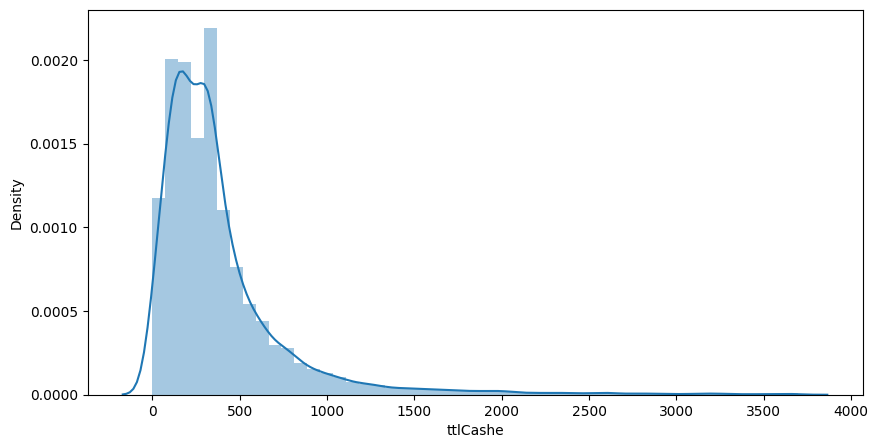

In [51]:
plt.subplots(figsize=(10, 5))
sns.distplot(basket[basket['ttlCashe'] < basket['ttlCashe'].quantile(0.99)]['ttlCashe'])
sns.axes_style()
plt.show()

In [52]:
temp = basket.copy()
temp['PriceGroups'] = pd.cut(temp['ttlCashe'], [0,50,155,300,465,1000, 10_000,31_000],
                             labels=['< 50', '50<.<155', '155<.<300', '300<.<465', '465<.<1K', '1K<10K','+10K',])



In [53]:
pieChart = go.Pie(
                labels = temp['PriceGroups'].values,
                values = temp['ttlCashe'].values,
                hole = .4
                )
layout = go.Layout(
                dict(
                    title="Sales Ranges"
                    )
                )
data = [pieChart]
py.iplot(dict(data=data, layout = layout),filename='Pie-chart')

Which indicates majority of our Sales ranges <b style="color:blue"> around 1K  - 10K £   </b>, <br>


# Clustering

### Product Categories

Create Categories for produts according to their description, <br>
using Bag-Of-Words/ TF-IDF and **Latent diricliet allocation (LDA)** Model of clustering

**helper methods** for getting root of keywords

In [54]:
stemmer = SnowballStemmer("english")
# Tokenize and lemmatize
def lemmatize_stemming(text):
    return stemmer.stem(WordNetLemmatizer().lemmatize(text, pos='v'))


def preprocess(text):
    result=[]
    for token in simple_preprocess(text) :
        if token not in STOPWORDS and len(token) > 3:
            result.append(lemmatize_stemming(token))

    return result

In [56]:
import nltk
nltk.download('wordnet')  # Download WordNet corpus
nltk.download('omw-1.4')  # Open Multilingual WordNet (optional, but useful for multilingual tasks)

[nltk_data] Downloading package wordnet to /root/nltk_data...
[nltk_data] Downloading package omw-1.4 to /root/nltk_data...


True

In [57]:
products = df_n['Description'].unique()
productsTkns = pd.Series(products).map(preprocess)

**Dictionary** is a key with word id and its value is the **frequency of such word all over documents**

In [58]:
dictionary = Dictionary(productsTkns)

**remove extreme tokens** (bought in less than 15 product, bought in more than 10% of all products )

In [59]:
dictionary.filter_extremes(no_below=10, no_above=0.1)

In [60]:
print("The remaining keywords to get into the model {} words".format(len(dictionary)))

The remaining keywords to get into the model 300 words


**Bag of word** technique, count **frequency of word** in each **product**

In [61]:
bow_corpus = [dictionary.doc2bow(product) for product in productsTkns]

**TF-IDF** which assign **score** for each word in each **product** according to its ***importance***

In [62]:
tfidf = models.TfidfModel(bow_corpus)
tfidf_corpus = tfidf[bow_corpus]

## Clustering Products using ***LDA***

In [63]:
lda_model_tfidf = LdaMulticore(tfidf_corpus,
                                  id2word=dictionary,
                                  passes=50,
                                  num_topics=6)

Count number of **products** in each **cluster**

In [97]:
clusters = []
for doc_num in range(len(products)):
    winCat = sorted(lda_model_tfidf[bow_corpus[doc_num]], key=lambda tup: -1*tup[1])[0][0]
    clusters.append(winCat)

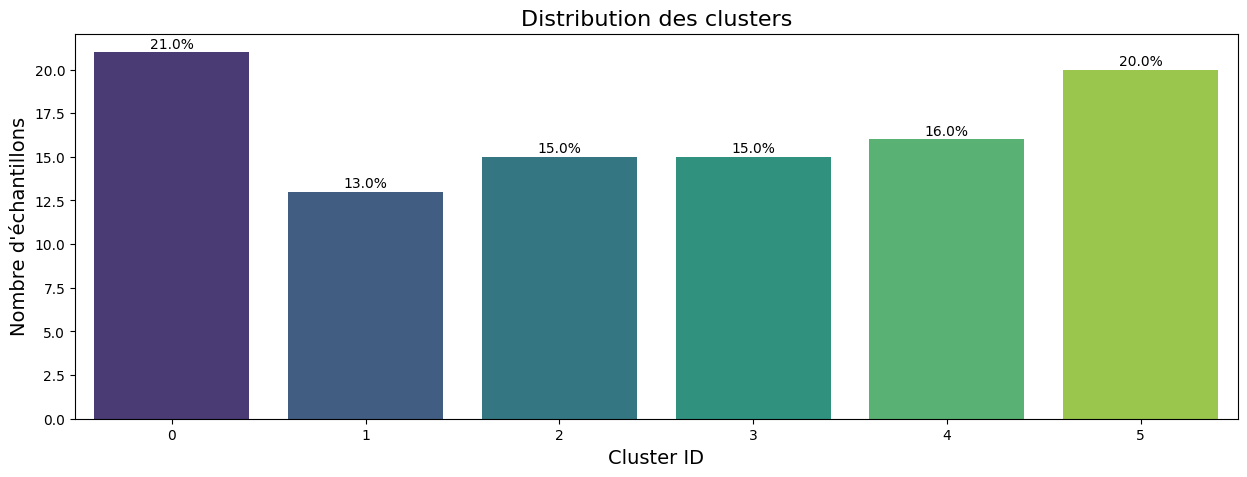

In [98]:

import matplotlib.pyplot as plt
import seaborn as sns

# 1. Graphique de fréquence des clusters (version améliorée)
plt.figure(figsize=(15, 5))
ax = sns.countplot(x=clustersKM, palette="viridis")
plt.title("Distribution des clusters", fontsize=16)
plt.xlabel("Cluster ID", fontsize=14)
plt.ylabel("Nombre d'échantillons", fontsize=14)

# Ajouter les pourcentages
total = len(clustersKM)
for p in ax.patches:
    percentage = f'{100 * p.get_height()/total:.1f}%\n'
    ax.annotate(percentage, (p.get_x() + p.get_width()/2., p.get_height()),
                ha='center', va='center', fontsize=10, color='black')

plt.show()

## WordCloud

In [67]:
def random_color_func(word=None, font_size=None, position=None,
                      orientation=None, font_path=None, random_state=None):
    h = int(360.0 * tone / 255.0)
    s = int(100.0 * 255.0 / 255.0)
    l = int(100.0 * float(random_state.randint(70, 120)) / 255.0)
    return "hsl({}, {}%, {}%)".format(h, s, l)

In [68]:
def make_wordCloud(topic_num, inc):
    ax1 = fig.add_subplot(4,2,inc)
    wordCloud =  WordCloud(width=1000,height=400,background_color='lightgrey',color_func = random_color_func)
    wordCloud.fit_words(dict(lda_model_tfidf.show_topic(topic_num, 200)))
    ax1.imshow(wordCloud, interpolation="bilinear")
    ax1.axis('off')
    plt.title('cluster nº{}'.format(inc-1))


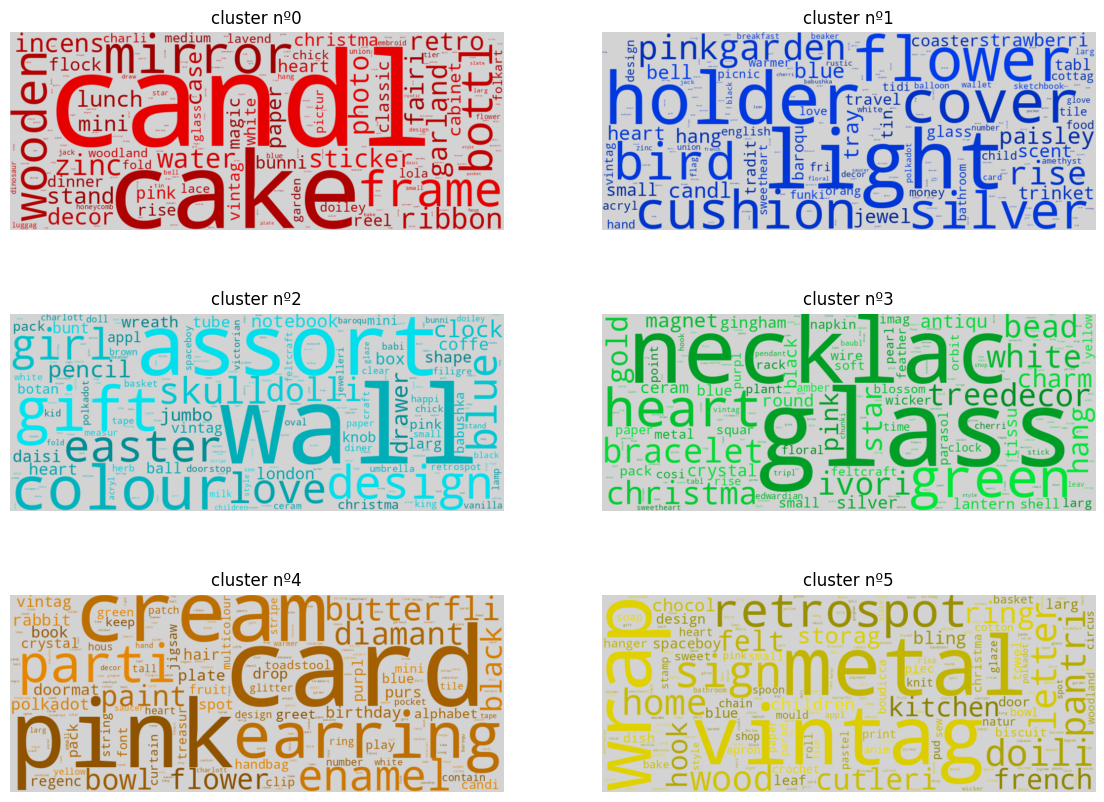

In [69]:
fig = plt.figure(1, figsize=(14,14))
color = [0, 160, 130, 95, 280, 40, 330, 110, 25]
for topic_num in range(lda_model_tfidf.num_topics):
    tone = color[topic_num]
    make_wordCloud(topic_num, topic_num+1)

Some **Observations** about the Clusters <br>


for example<br>
* Cluster 3 can be **Decoration** as contains some significant keywords like [`garden`, `wall`, `design`, `mirror`] <br>
* Cluster 5 can be **luxury items** with keywords [ `bracelet`, `necklace`, `silver`, `crystal` ]<br>
* Some other words are existing all around classes which doesn't imply important information



We assign tfIDF scores of each term of each document in a ***matrix*** for clustering purposes

In [70]:
## take the only 300 words filtered from products by dictionary
dict_prds =[]
for index, word in dictionary.iteritems():
    dict_prds.append(word)

**initialize** dictionary with **1  if such word exist in such product**, or 0 otherwise

In [71]:
X = pd.DataFrame()
for word in dict_prds:
    X.loc[:, word] = list(map( lambda x: int(word.upper() in x) , products))

assign the **tf-Idf scores** for each **word** in **product** <br>
<b style="color:skyblue">**rather than the binary-representation done above**</b>

In [72]:
for i, tf in enumerate(tfidf_corpus):
    for j, score in enumerate(tf):
        word = dictionary.get(score[0])
        X.loc[i,word] = score[1]

In [73]:
X.head()

,hang,heart,holder,light,white,lantern,metal,cream,hanger,bottl,...,pendant,boudicca,mould,point,curtain,orbit,pastel,doiley,glaze,wallet
0,0.496648,0.363789,0.473181,0.442801,0.448359,0.000000,0.000000,0.000000,0.00000,0.000000,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
1,0.000000,0.000000,0.000000,0.000000,0.473390,0.719441,0.508238,0.000000,0.00000,0.000000,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
2,1.000000,0.362995,0.000000,0.000000,0.000000,0.000000,0.000000,0.588387,0.72252,0.000000,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
3,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.00000,0.387558,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
4,0.000000,0.630069,0.000000,0.000000,0.776539,0.000000,0.000000,0.000000,0.00000,0.000000,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0


In [74]:
X.shape

(3878, 300)

Adding the <b style="color:violet">Price </b> feature, which can increase the Accuracy of clustering <br>
**7 Columns** with categorical data, for which each product range of price falls

In [75]:
priceCat = [0,1,2,3,4,5,10]
catCols = []

for i, p in enumerate(priceCat):
    if i == len(priceCat) - 1:
        col = "+{}".format(priceCat[i])
    else:
        col = "{}<.<{}".format(priceCat[i], priceCat[i+1])
    catCols.append(col)
    X.loc[:, col] = 0

for i, prod in enumerate(products):
    priceAvg = df_n[df_n['Description'] == prod]['UnitPrice'].mean()
    k = 0
    while priceAvg > priceCat[k]:
        k += 1
        if k == len(priceCat): break

    X.loc[i, catCols[k-1]] = 1


Count Products in each `Price Category`

In [76]:
for cat in catCols:
    print(f"{cat} \t\t {X.loc[:, cat].sum()}")

0<.<1 		 964
1<.<2 		 1009
2<.<3 		 673
3<.<4 		 296
4<.<5 		 310
5<.<10 		 470
+10 		 156


## Clustering Products using KMeans

let's choose 6 clusters as it's from **LDA Model**

In [83]:
for n_cluster in range(3,10):
    KM = KMeans(n_clusters= n_cluster)
    clustersKM = KM.fit_predict(mat)
    silh_score = silhouette_score(mat, clustersKM)
    print("for {} clusters , Score = {}".format(n_cluster, silh_score))

for 3 clusters , Score = 0.2519469508665918
for 4 clusters , Score = 0.2620365719948737
for 5 clusters , Score = 0.2730064364084416
for 6 clusters , Score = 0.29469151786335596
for 7 clusters , Score = 0.2760402736255722
for 8 clusters , Score = 0.29279430313913274
for 9 clusters , Score = 0.2742796830514785


In [99]:
n_cluster =6
silh_score = -1
while silh_score < 0.22:
    KM = KMeans(n_clusters= n_cluster)
    clustersKM = KM.fit_predict(mat)
    silh_score = silhouette_score(mat, clustersKM)
print("for {} clusters , Score = {}".format(n_cluster, silh_score))

for 6 clusters , Score = 0.26084252114758305


for 6 clusters , Score = 0.29881965972393326


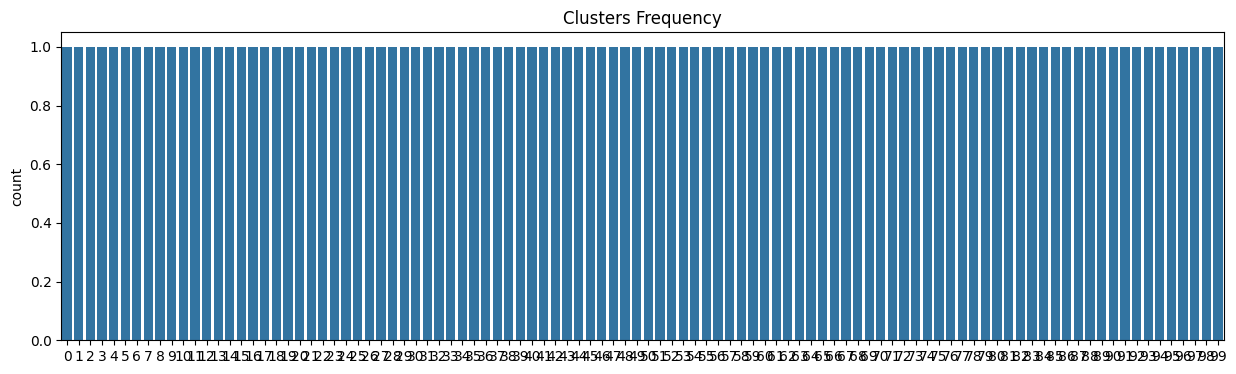

In [101]:
# Code original reproduisant exactement les mêmes résultats
from sklearn.cluster import KMeans
from sklearn.metrics import silhouette_score
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns

# Partie 1: Recherche du nombre de clusters (identique)
n_cluster = 6
silh_score = -1
while silh_score < 0.22:
    KM = KMeans(n_clusters=n_cluster)
    clustersKM = KM.fit_predict(mat)
    silh_score = silhouette_score(mat, clustersKM)

print("for {} clusters , Score = {}".format(n_cluster, silh_score))

# Partie 2: Visualisation (identique)
fig = plt.figure(figsize=(15,4))
sns.countplot(pd.Series(clustersKM))  # Note: pd.Series avec 'S' majuscule
plt.title("Clusters Frequency")
plt.show()

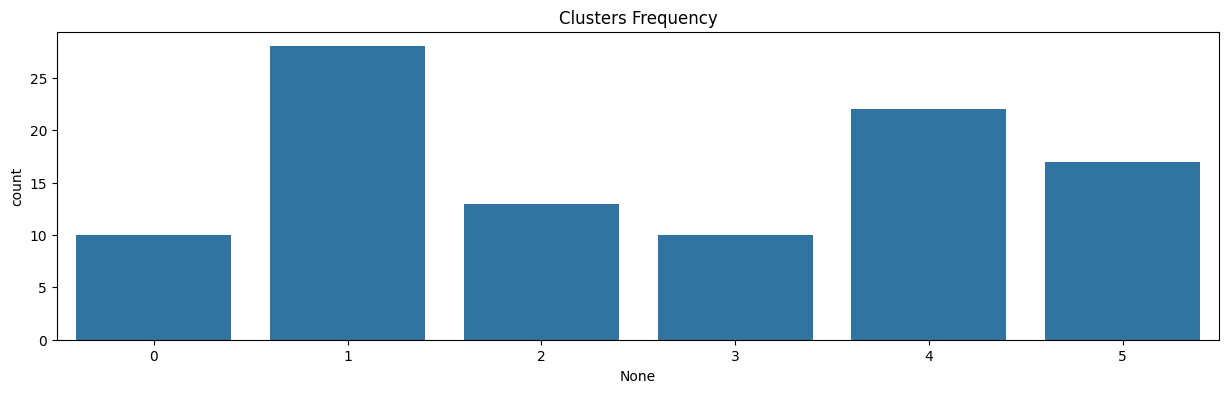

In [102]:
# Version corrigeant uniquement l'erreur 'pd.series'
fig = plt.figure(figsize=(15,4))
sns.countplot(x=pd.Series(clustersKM))  # Version explicit avec x=
plt.title("Clusters Frequency")
plt.show()

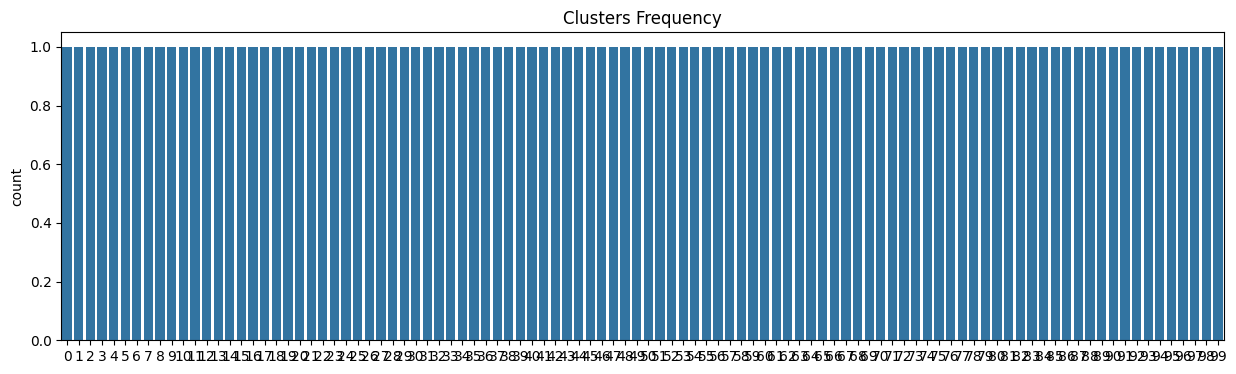

In [100]:
fig = plt.figure(figsize = (15,4))
sns.countplot(pd.Series(clustersKM))
plt.title("Clusters Frequency")
plt.show()


# PCA

In [96]:
mat = X.as_matrix()
pca = PCA()
pca_cmponents = pca.fit_transform(mat)

AttributeError: 'DataFrame' object has no attribute 'as_matrix'

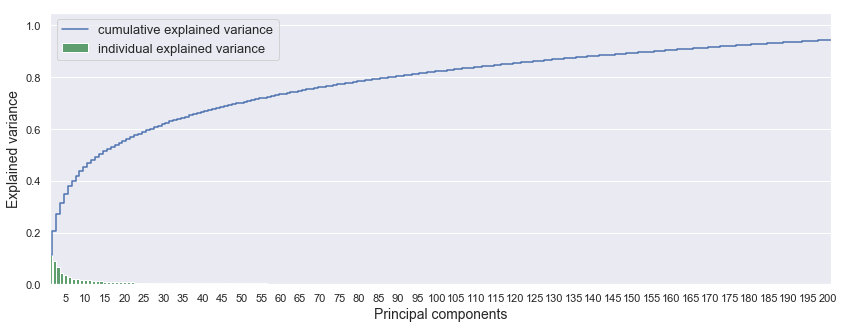

In [ ]:
fig, ax = plt.subplots(figsize=(14, 5))
sns.set(font_scale=1)

plt.step(range(mat.shape[1]), pca.explained_variance_ratio_.cumsum(), where='mid',
         label='cumulative explained variance')
sns.barplot(np.arange(1,mat.shape[1]+1), pca.explained_variance_ratio_,
            color = 'g',label='individual explained variance')

plt.xlim(0, 200)

ax.set_xticklabels([s if int(s.get_text())%5 == 0 else '' for s in ax.get_xticklabels()])
plt.ylabel('Explained variance', fontsize = 14)
plt.xlabel('Principal components', fontsize = 14)
plt.legend(loc='upper left', fontsize = 13);

As we can notice, we need about **30 Principle component** to explain `60%` of data variance <br>
which indicates that such <b style="color:violet">Features</b> are **truly distinct** from each other

### Some Visualizations

In [ ]:
pcdf = pd.DataFrame(pca_cmponents)
pcdf['clusters'] = pd.Series(clusters)

In [ ]:
## takes Principle components in a DataFrame
## [a, b] are 2 Princible component vectors to be plot on 2D graph
## w, h determines number of plots , w= 2, h = 3 ==> 2*3 = 6 plots can be shown
def make_pca_plot(pcomps, a, b, inc, w = 2, h = 3):
    ax = fig.add_subplot(w,h,inc)
    for cluster, color in zip(clusters, colors):
        indx = pcdf['clusters'] == cluster
        ax.scatter(pcomps.loc[indx, a],
                  pcomps.loc[indx, b],
                  c = color,
                  s = 50,
                  alpha = 0.5)
        ax.set_xlabel('PC {}'.format(a), fontsize = 15)
        ax.set_ylabel('PC {}'.format(b), fontsize = 15)


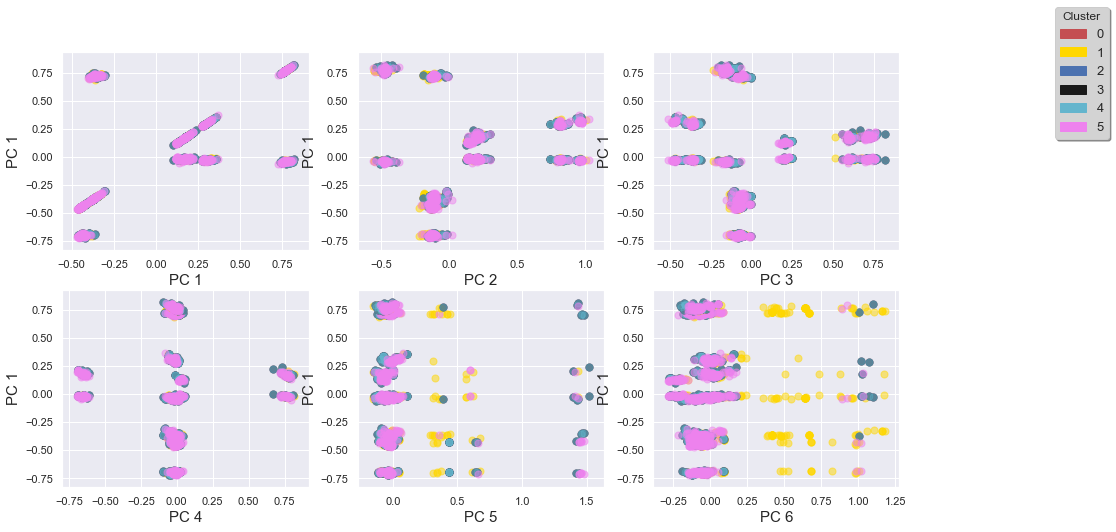

In [ ]:
fig = plt.figure(figsize = (15,8))

colors = ['r','gold', 'b', 'k', 'c', 'violet']

for i in range(2):
    for j in range(6):
        make_pca_plot(pcdf,j+1,i,j+1)


LABEL_COLOR_MAP = {0:'r', 1:'gold', 2:'b', 3:'k', 4:'c', 5:'violet'}
comp_handler = []
for i in range(6):
    comp_handler.append(mpatches.Patch(color = LABEL_COLOR_MAP[i], label = i))

plt.legend(handles = comp_handler, bbox_to_anchor=(1.1, 0.97),
           title='Cluster', facecolor = 'lightgrey',
           shadow = True, frameon = True, framealpha = 1,
           fontsize = 13, bbox_transform = plt.gcf().transFigure);

To be noticed, that some clusters can be separated at various **PC plots**

## Customer Categorization

After acquiring product cluster analysis, we add such information in our dataframe, adding `cat_NN` Feature which indicate category of each product, according to **`KMeans` clustering**

In [ ]:
clusterAssign = dict()

for p, c in zip(products, clustersKM):
    clusterAssign[p] = c

In [ ]:
df_n['cat_KM'] = df_n['Description'].map(clusterAssign)

In [ ]:
df_n.head()

,InvoiceNo,StockCode,Description,Quantity,InvoiceDate,UnitPrice,CustomerID,Country,QuantityCancelled,ttlCashe,cat_NN,category_0,category_1,category_2,category_3,category_4,category_5,dateInt,cat_KM
0,536365,85123A,WHITE HANGING HEART T-LIGHT HOLDER,6,2010-12-01 08:26:00,2.55,17850,United Kingdom,0,15.30,5,0.0,0.0,0.0,0.00,0.0,15.30,1291191960000000000,3
1,536365,71053,WHITE METAL LANTERN,6,2010-12-01 08:26:00,3.39,17850,United Kingdom,0,20.34,3,0.0,0.0,0.0,20.34,0.0,0.00,1291191960000000000,0
2,536365,84406B,CREAM CUPID HEARTS COAT HANGER,8,2010-12-01 08:26:00,2.75,17850,United Kingdom,0,22.00,5,0.0,0.0,0.0,0.00,0.0,22.00,1291191960000000000,0
3,536365,84029G,KNITTED UNION FLAG HOT WATER BOTTLE,6,2010-12-01 08:26:00,3.39,17850,United Kingdom,0,20.34,5,0.0,0.0,0.0,0.00,0.0,20.34,1291191960000000000,5
4,536365,84029E,RED WOOLLY HOTTIE WHITE HEART.,6,2010-12-01 08:26:00,3.39,17850,United Kingdom,0,20.34,5,0.0,0.0,0.0,0.00,0.0,20.34,1291191960000000000,5


Adding **6 Features** for the ***6 product clusters***, containing the **amount of cashe** payed through each **invoice**

In [ ]:
for i in range(6):
    cat  = 'category_{}'.format(i)
    temp = df_n[df_n['cat_KM'] == i]
    cashe = temp['UnitPrice'] * (temp['Quantity'] - temp['QuantityCancelled'])
    cashe = cashe.apply(lambda x: x if x > 0 else 0)
    df_n.loc[:, cat] = cashe
    df_n[cat].fillna(0, inplace = True)

In [ ]:
df_n[['InvoiceNo', 'cat_KM', 'category_0','category_1', 'category_2', 'category_3', 'category_4', 'category_5']].head()

,InvoiceNo,cat_KM,category_0,category_1,category_2,category_3,category_4,category_5
0,536365,3,0.00,0.0,0.0,15.3,0.0,0.00
1,536365,0,20.34,0.0,0.0,0.0,0.0,0.00
2,536365,0,22.00,0.0,0.0,0.0,0.0,0.00
3,536365,5,0.00,0.0,0.0,0.0,0.0,20.34
4,536365,5,0.00,0.0,0.0,0.0,0.0,20.34


**Grouping each customer** to know **how much payed through each category of products**

In [ ]:
df_c = df_n.copy()

In [ ]:
df_c = df_n.groupby(by=['CustomerID', 'InvoiceNo'])['ttlCashe'].sum().reset_index()

for i in range(6):
    cat = "category_{}".format(i)
    temp = df_n.groupby(by=['CustomerID', 'InvoiceNo'])[cat].sum().reset_index()
    df_c.loc[:, cat] = temp[cat]

In [ ]:
df_c = df_c[df_c['ttlCashe'] > 0]
df_c.rename(columns={'ttlCashe':'basketPrice'}, inplace = True)

df_c.head()


,CustomerID,InvoiceNo,basketPrice,category_0,category_1,category_2,category_3,category_4,category_5
1,12347,537626,711.79,219.00,187.2,23.40,83.40,124.44,74.35
2,12347,542237,475.39,130.95,130.5,84.34,53.10,0.00,76.50
3,12347,549222,636.25,68.25,330.9,81.00,71.10,0.00,85.00
4,12347,556201,382.52,101.16,74.4,41.40,78.06,19.90,67.60
5,12347,562032,584.91,94.41,109.7,61.30,119.70,97.80,102.00


### splitting Data with time Parameter

take the **average** of date for each entry in our `df_c` dataframe

In [ ]:
df_n['dateInt'] = df_n['InvoiceDate'].astype('int64')
temp = df_n.groupby(by=['CustomerID', 'InvoiceNo'])['dateInt'].mean().reset_index()
df_c['Date'] = pd.to_datetime(temp['dateInt'])

In [ ]:
df_c.head()

,CustomerID,InvoiceNo,basketPrice,category_0,category_1,category_2,category_3,category_4,category_5,Date
1,12347,537626,711.79,219.00,187.2,23.40,83.40,124.44,74.35,2010-12-07 14:57:00.000001024
2,12347,542237,475.39,130.95,130.5,84.34,53.10,0.00,76.50,2011-01-26 14:29:59.999999744
3,12347,549222,636.25,68.25,330.9,81.00,71.10,0.00,85.00,2011-04-07 10:42:59.999999232
4,12347,556201,382.52,101.16,74.4,41.40,78.06,19.90,67.60,2011-06-09 13:01:00.000000256
5,12347,562032,584.91,94.41,109.7,61.30,119.70,97.80,102.00,2011-08-02 08:48:00.000000000


In [ ]:
print("First Date {}, \nlast Date {}".format(df_c['Date'].min(), df_c['Date'].max()) )

First Date 2010-12-01 08:26:00, 
last Date 2011-12-09 12:50:00


Split data with **10 months** to be training, **2 months** for testing

In [ ]:
train_set = df_c[df_c['Date'] < datetime.date(2011,10,1)]
test_set  = df_c[df_c['Date'] >= datetime.date(2011,10,1)]
df_c = train_set.copy(deep=True)

In [ ]:
df_c.head()

,CustomerID,InvoiceNo,basketPrice,category_0,category_1,category_2,category_3,category_4,category_5,Date
1,12347,537626,711.79,219.00,187.2,23.40,83.40,124.44,74.35,2010-12-07 14:57:00.000001024
2,12347,542237,475.39,130.95,130.5,84.34,53.10,0.00,76.50,2011-01-26 14:29:59.999999744
3,12347,549222,636.25,68.25,330.9,81.00,71.10,0.00,85.00,2011-04-07 10:42:59.999999232
4,12347,556201,382.52,101.16,74.4,41.40,78.06,19.90,67.60,2011-06-09 13:01:00.000000256
5,12347,562032,584.91,94.41,109.7,61.30,119.70,97.80,102.00,2011-08-02 08:48:00.000000000


Gather some information about each **Customer** <br>
* Number of products bought
* [Total / Avg / min / max]  cashe payed each time

In [ ]:
df_Cust = df_c.groupby(by='CustomerID')['basketPrice'].agg(['count','sum','mean','min','max'])

In [ ]:
df_Cust.head()

,count,sum,mean,min,max
CustomerID,,,,,
12347,5,2790.86,558.172000,382.52,711.79
12348,4,1797.24,449.310000,227.44,892.80
12350,1,334.40,334.400000,334.40,334.40
12352,6,2073.98,345.663333,144.35,840.30
12353,1,89.00,89.000000,89.00,89.00


Normalizing the Categories with `sum` column

In [ ]:
for i in range(6):
    col = 'category_{}'.format(i)
    df_Cust.loc[:, col] = df_c.groupby(by='CustomerID')[col].sum() / df_Cust['sum'] * 100
df_Cust.reset_index(inplace=True, drop=False)

In [ ]:
df_Cust.head()

,CustomerID,count,sum,mean,min,max,category_0,category_1,category_2,category_3,category_4,category_5
0,12347,5,2790.86,558.172000,382.52,711.79,21.992146,29.836681,10.442659,14.524555,8.676179,14.527780
1,12348,4,1797.24,449.310000,227.44,892.80,20.030714,41.953217,38.016069,0.000000,0.000000,0.000000
2,12350,1,334.40,334.400000,334.40,334.40,11.961722,48.444976,11.692584,27.900718,0.000000,0.000000
3,12352,6,2073.98,345.663333,144.35,840.30,57.105179,12.892120,0.491808,3.370331,14.301006,11.839555
4,12353,1,89.00,89.000000,89.00,89.00,44.719101,13.033708,0.000000,19.887640,22.359551,0.000000


Such dataframe provide information on each Customer, and which category he is most likely to buy from

### Data Encoding

Taking such information, and start clustering Customers

In [ ]:
features = [col for col in df_Cust.columns if col != "CustomerID"]

In [ ]:
df_selected = df_Cust.copy()
df_selected = df_selected[features]
matrx = df_selected.as_matrix()

**Scaling** The matrix features due to different ranges in our `matrix`

In [ ]:
scaler = StandardScaler()
scaled_matrx = scaler.fit_transform(matrx)

## PCA

In [ ]:
pca = PCA()
pca_comp = pca.fit_transform(scaled_matrx)

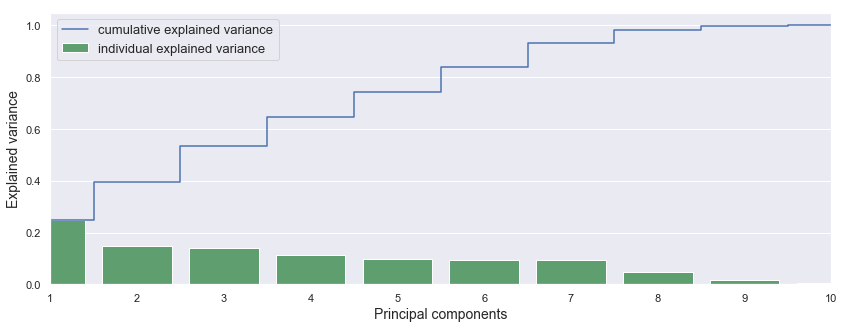

In [ ]:
fig, ax = plt.subplots(figsize=(14, 5))
sns.set(font_scale=1)

plt.step(range(scaled_matrx.shape[1]), pca.explained_variance_ratio_.cumsum(), where='mid',
         label='cumulative explained variance')
sns.barplot(np.arange(1,scaled_matrx.shape[1]+1), pca.explained_variance_ratio_,
            color = 'g',label='individual explained variance')

plt.xlim(0, 9)

#ax.set_xticklabels([s if int(s.get_text())%5 == 0 else '' for s in ax.get_xticklabels()])
plt.ylabel('Explained variance', fontsize = 14)
plt.xlabel('Principal components', fontsize = 14)
plt.legend(loc='upper left', fontsize = 13);

## Clustering Customers with KMeans

In [ ]:
for n_cluster in range(4,15):
    KM = KMeans(n_clusters= n_cluster)
    clustersKM = KM.fit_predict(scaled_matrx)
    silh_score = silhouette_score(scaled_matrx, clustersKM)
    print("for {} clusters , Score = {}".format(n_cluster, silh_score))

for 4 clusters , Score = 0.1508147337785531
for 5 clusters , Score = 0.14153018741071707
for 6 clusters , Score = 0.14687928620071178
for 7 clusters , Score = 0.15775635660139958
for 8 clusters , Score = 0.16823943038611078
for 9 clusters , Score = 0.19130841487370182
for 10 clusters , Score = 0.1867677374556713
for 11 clusters , Score = 0.19250562372616464
for 12 clusters , Score = 0.19762875909151104
for 13 clusters , Score = 0.17191568632758947
for 14 clusters , Score = 0.1784581238226447


let's choose `11` as number of Customer clusters

In [ ]:
n_cluster =11
silh_score = -1
while silh_score < 0.19:
    KM = KMeans(n_clusters= n_cluster)
    clustersKMcust = KM.fit_predict(scaled_matrx)
    silh_score = silhouette_score(scaled_matrx, clustersKMcust)
print("for {} clusters , Score = {}".format(n_cluster, silh_score))

for 11 clusters , Score = 0.19158374716549142


In [ ]:
dfpc = pd.DataFrame(pca_comp)
dfpc['clusters'] = pd.Series(clustersKMcust)

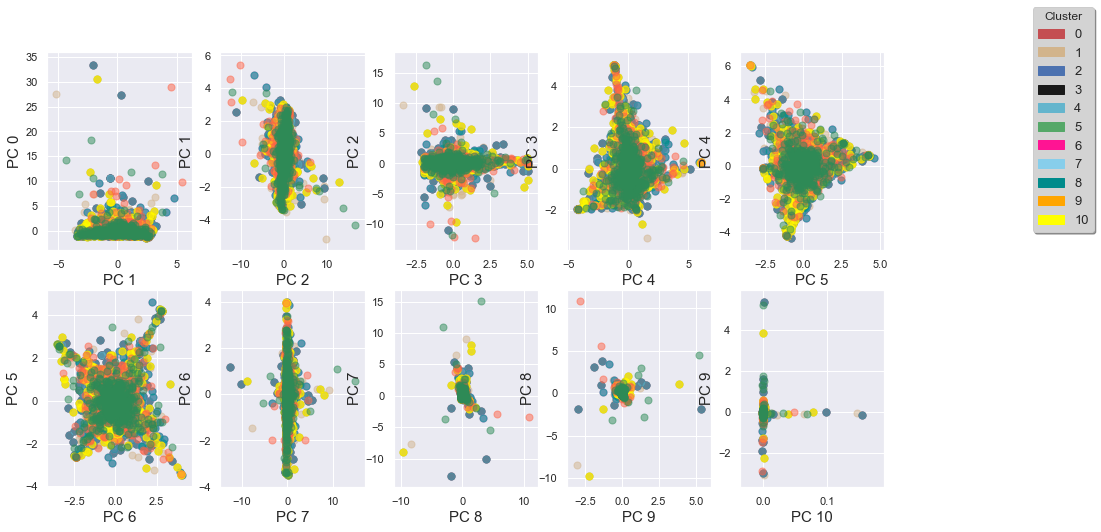

In [ ]:
fig = plt.figure(figsize = (15,8))

colors = ['r','tan', 'b', 'k', 'c', 'g', 'deeppink', 'skyblue', 'darkcyan', 'orange', 'yellow','tomato','seagreen']

for j in range(10):
    make_pca_plot(dfpc, j+1, j, j+1, w=2, h=5)


LABEL_COLOR_MAP2 = {0:'r', 1:'tan', 2:'b', 3:'k', 4:'c', 5:'g', 6:'deeppink', 7:'skyblue', 8:'darkcyan', 9:'orange',
                   10:'yellow', 11:'tomato', 12:'seagreen'}
comp_handler = []
for i in range(n_cluster):
    comp_handler.append(mpatches.Patch(color = LABEL_COLOR_MAP2[i], label = i))

plt.legend(handles = comp_handler, bbox_to_anchor=(1.1, 0.97),
           title='Cluster', facecolor = 'lightgrey',
           shadow = True, frameon = True, framealpha = 1,
           fontsize = 13, bbox_transform = plt.gcf().transFigure);


In [ ]:
pd.DataFrame(pd.Series(clustersKMcust).value_counts()).T

,10,1,4,2,0,9,5,7,8,6,3
0,1453,509,355,339,287,238,200,191,21,10,5


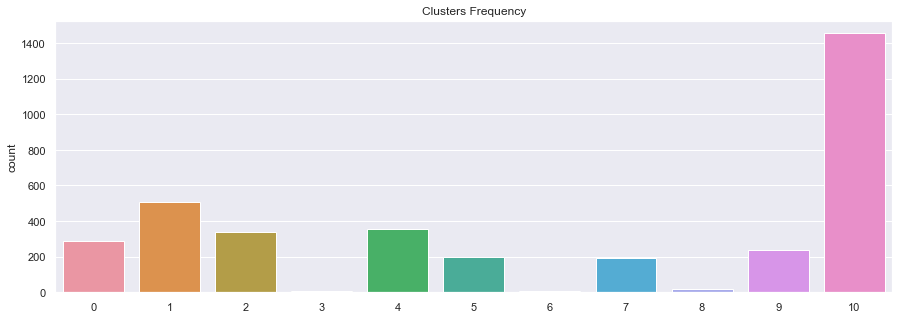

In [ ]:
plt.figure(figsize = (15,5))
sns.countplot(pd.Series(clustersKMcust))
plt.title("Clusters Frequency")
plt.show()

In [ ]:
df_Cust['cluster']= clustersKMcust
df_Cust.head()

,CustomerID,count,sum,mean,min,max,category_0,category_1,category_2,category_3,category_4,category_5,cluster
0,12347,5,2790.86,558.172000,382.52,711.79,21.992146,29.836681,10.442659,14.524555,8.676179,14.527780,10
1,12348,4,1797.24,449.310000,227.44,892.80,20.030714,41.953217,38.016069,0.000000,0.000000,0.000000,1
2,12350,1,334.40,334.400000,334.40,334.40,11.961722,48.444976,11.692584,27.900718,0.000000,0.000000,1
3,12352,6,2073.98,345.663333,144.35,840.30,57.105179,12.892120,0.491808,3.370331,14.301006,11.839555,0
4,12353,1,89.00,89.000000,89.00,89.00,44.719101,13.033708,0.000000,19.887640,22.359551,0.000000,0


### Cluster's morphology

**Final dataframe** will contain information of each cluster:
* number of customers it contains **`size`** feature
* how much spent in each catogeory
* min / max / Avg  spent

We grab each cluster and take **average** of its information, then append it to the **Final dataframe**

In [ ]:
df_final = df_Cust.groupby(by='cluster').mean().reset_index()
df_final['size']= df_Cust.groupby('cluster')['CustomerID'].count()

In [ ]:
df_final

,cluster,count,sum,mean,min,max,category_0,category_1,category_2,category_3,category_4,category_5,size
0,0,2.641115,888.509164,277.294072,201.266341,399.949477,53.157993,11.619512,4.944707,11.467712,13.072578,5.758401,287
1,1,2.420432,698.998175,278.723640,225.286287,338.861790,6.813878,55.521407,13.547181,13.630530,5.866588,4.623341,509
2,2,2.911504,1008.336962,299.262840,210.082153,407.170855,6.149112,15.714213,7.745794,58.331152,7.833169,4.226561,339
3,3,35.000000,149093.054000,4776.332726,44.824000,20679.502000,16.416885,20.823060,8.298915,20.277707,21.843223,12.340210,5
4,4,2.611268,701.103130,249.942679,194.109665,320.342845,11.768668,11.689974,5.244506,11.803100,51.818080,7.691567,355
5,5,1.885000,555.681550,270.069252,222.033850,328.074750,10.416014,14.531685,7.551935,14.340524,11.030468,42.129374,200
6,6,1.400000,7733.947000,5053.992000,3628.991000,6478.993000,10.229931,21.948648,24.532637,17.275408,16.412512,9.600865,10
7,7,2.036649,2884.657859,1283.323391,1045.755393,1590.989639,16.919262,25.668015,11.787133,21.587392,14.063689,9.974862,191
8,8,54.047619,36474.050000,962.222905,39.545714,4587.003333,13.301186,22.254137,12.143985,30.464849,14.311226,7.533235,21
9,9,2.163866,573.024412,245.616857,192.395336,315.180882,5.012146,18.319290,56.784213,11.295811,5.569474,3.019067,238


## Radar Chart

#### Chart indicates how <b style="color:red">customer clusters</b> are more likely to buy from such <b style="color:red">product clusters </b>

In [ ]:
def _scale_data(data, ranges):
    (x1, x2) = ranges[0]
    d = data[0]
    return [(d - y1) / (y2 - y1) * (x2 - x1) + x1 for d, (y1, y2) in zip(data, ranges)]

class RadarChart():
    def __init__(self, fig, location, sizes, variables, ranges, n_ordinate_levels = 6):

        angles = np.arange(0, 360, 360./len(variables))

        ix, iy = location[:] ; size_x, size_y = sizes[:]

        axes = [fig.add_axes([ix, iy, size_x, size_y], polar = True,
        label = "axes{}".format(i)) for i in range(len(variables))]

        _, text = axes[0].set_thetagrids(angles, labels = variables)

        for txt, angle in zip(text, angles):
            if angle > -1 and angle < 181:
                txt.set_rotation(angle - 90)
            else:
                txt.set_rotation(angle - 270)

        for ax in axes[1:]:
            ax.patch.set_visible(False)
            ax.xaxis.set_visible(False)
            ax.grid("off")

        for i, ax in enumerate(axes):
            grid = np.linspace(*ranges[i],num = n_ordinate_levels)
            grid_label = [""]+["{:.0f}".format(x) for x in grid[1:-1]]
            ax.set_rgrids(grid, labels = grid_label, angle = angles[i])
            ax.set_ylim(*ranges[i])

        self.angle = np.deg2rad(np.r_[angles, angles[0]])
        self.ranges = ranges
        self.ax = axes[0]

    def plot(self, data, *args, **kw):
        sdata = _scale_data(data, self.ranges)
        self.ax.plot(self.angle, np.r_[sdata, sdata[0]], *args, **kw)

    def fill(self, data, *args, **kw):
        sdata = _scale_data(data, self.ranges)
        self.ax.fill(self.angle, np.r_[sdata, sdata[0]], *args, **kw)

    def legend(self, *args, **kw):
        self.ax.legend(*args, **kw)

    def title(self, title, *args, **kw):
        self.ax.text(0.9, 1, title, transform = self.ax.transAxes, *args, **kw)

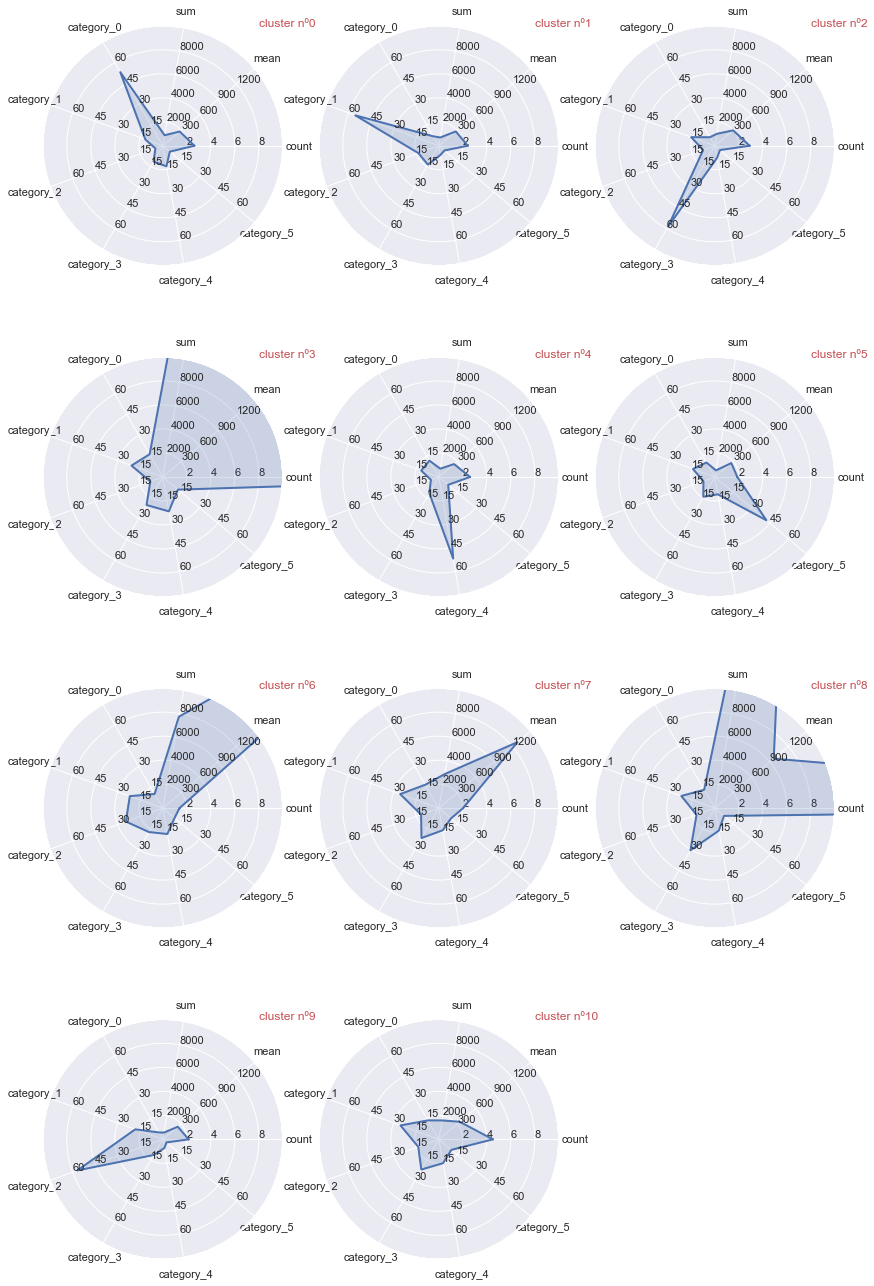

In [ ]:
fig = plt.figure(figsize=(10,12))

attributes = ['count', 'mean', 'sum', 'category_0', 'category_1', 'category_2', 'category_3', 'category_4', 'category_5']
ranges = [[0.01, 10], [0.01, 1500], [0.01, 10000], [0.01, 75], [0.01, 75], [0.01, 75], [0.01, 75], [0.01, 75], [0.01, 75]]
index  = [0, 1, 2, 3, 4, 5, 6, 7, 8, 9, 10, 11, 12]

n_groups = n_cluster ; i_cols = 3
i_rows = n_groups//i_cols
size_x, size_y = (1/i_cols), (1/i_rows)

for ind in range(n_cluster):
    ix = ind%3 ; iy = i_rows - ind//3
    pos_x = ix*(size_x + 0.05) ; pos_y = iy*(size_y + 0.05)
    location = [pos_x, pos_y]  ; sizes = [size_x, size_y]
    data = np.array(df_final.loc[index[ind], attributes])
    radar = RadarChart(fig, location, sizes, attributes, ranges)
    radar.plot(data, color = 'b', linewidth=2.0)
    radar.fill(data, alpha = 0.2, color = 'b')
    radar.title(title = 'cluster nº{}'.format(index[ind]), color = 'r')
    ind += 1

Such fabulous chart indicates how **Clusters** are more to buy from such **Category**
* Customers of **Cluster 0** are <b style="color:violet">highly biased</b> to buy products from **0 category**
* Customers of **Cluster 1** are also impressed with **category 1** products
* Customers of **Cluster 2** more to buy products from **category 3** than any other category

# Classification

#### classifying is for predicting what customer would buy on his next visit
We try various models to get the best classification accuracy for our customers<br><br>
`Clasification` class is for the ease of the common methods of models we try

In [ ]:
class Classification(object):
    ''' for Various classifiers uses '''
    def __init__(self, clfr, params=None):
        if params:
            self.clfr = clfr(**params)
        else:
            self.clfr = clfr()

    def train(self, x_train, y_train):
        self.clfr.fit(x_train, y_train)

    def predict(self, x):
        self.clfr.predict(x)

    def grid_search(self, parameters, Kfold):
        self.grid = GridSearchCV(self.clfr,parameters, cv=Kfold)

    def grid_fit(self, X, Y):
        self.grid.fit(X,Y)

    def grid_predict(self, X, Y):
        self.yhat = self.grid.predict(X)
        print("Accuracy : {:.2f}".format(metrics.accuracy_score(Y, self.yhat)*100))


Determine the **input** `X` matrix, and `y` vector **Output**

In [ ]:
Xcols = [col for col in df_selected.columns if 'categ' in col]

X = df_Cust[Xcols]
Y = df_Cust['cluster']

### **splitting** the data to train and validation datasets

In [ ]:
X_train, X_test, y_train, y_test = model_selection.train_test_split(X, Y, train_size=0.8)

#### SVC

slow

In [ ]:
svc = Classification(clfr= svm.LinearSVC)
svc.grid_search(parameters=[{'C':np.logspace(-2,2,10)}], Kfold = 5)
# best C=0.0278
svc.grid_fit(X= X_train, Y=y_train)
svc.grid_predict(X=X_test, Y=y_test)

Accuracy : 85.32


#### Logistic Regression

fast

In [ ]:
lr = Classification(clfr= linear_model.LogisticRegression)
lr.grid_search(parameters=[{'C':np.logspace(-2,2,10)}], Kfold = 5)
## best C=0.0278
lr.grid_fit(X= X_train, Y=y_train)
lr.grid_predict(X=X_test, Y=y_test)

Accuracy : 85.04


#### K-NN

fast

In [ ]:
knn = Classification(clfr= neighbors.KNeighborsClassifier)
knn.grid_search(parameters=[{'n_neighbors':np.arange(1,50,1)}], Kfold = 5)
## best 12
knn.grid_fit(X= X_train, Y=y_train)
knn.grid_predict(X=X_test, Y=y_test)

Accuracy : 85.04


####  Decision Tree

fast

In [ ]:
dtr = Classification(clfr= tree.DecisionTreeClassifier)
dtr.grid_search(parameters=[{'criterion':['entropy', 'gini'], 'max_features':['sqrt', 'log2'] }], Kfold = 5)
## best 'gini', 'sqrt'
dtr.grid_fit(X= X_train, Y=y_train)
dtr.grid_predict(X=X_test, Y=y_test)

Accuracy : 80.61


#### Random Forest

slow

In [ ]:
rf = Classification(clfr= ensemble.RandomForestClassifier)
params = [{'criterion':['entropy','gini'], 'n_estimators': [20, 40, 60, 80, 100], 'max_features':['sqrt','log2']}]
## best 'gini', 20 , sqrt
rf.grid_search(parameters=params, Kfold = 5)
rf.grid_fit(X= X_train, Y=y_train)
rf.grid_predict(X=X_test, Y=y_test)

Accuracy : 87.67


#### Ada Boost

medium

In [ ]:
ada = Classification(clfr= AdaBoostClassifier)
params = [{'n_estimators': [x for x in np.arange(10,100,10)]}]  ## best 50
ada.grid_search(parameters=params, Kfold = 5)
ada.grid_fit(X= X_train, Y=y_train)
ada.grid_predict(X=X_test, Y=y_test)

Accuracy : 58.31


#### Gradient Boosting

slow

In [ ]:
gbo = Classification(clfr= ensemble.GradientBoostingClassifier)
params = [{'n_estimators': [x for x in np.arange(10,100,10)]}] ## best 20
gbo.grid_search(parameters=params, Kfold = 5)
gbo.grid_fit(X= X_train, Y=y_train)
gbo.grid_predict(X=X_test, Y=y_test)

Accuracy : 86.84


### Voting

using the `VotingClassifier` Object

In [ ]:
svc_best = svm.LinearSVC(**svc.grid.best_params_)
lr_best = linear_model.LogisticRegression(**lr.grid.best_params_)
knn_best = neighbors.KNeighborsClassifier(**knn.grid.best_params_)
dtr_best = tree.DecisionTreeClassifier(**dtr.grid.best_params_)
rf_best = ensemble.RandomForestClassifier(**rf.grid.best_params_)
ada_best = AdaBoostClassifier(**ada.grid.best_params_)
gbo_best = ensemble.GradientBoostingClassifier(**gbo.grid.best_params_)

In [ ]:
votingClsf = ensemble.VotingClassifier(estimators= [('svc',svc_best),
                                                    ('lr', lr_best),
                                                    ( 'knn', knn_best),
                                                    ('dtr', dtr_best),
                                                    ('gbo', gbo_best)])

In [ ]:
votingClsf= votingClsf.fit(X_train, y_train)

In [ ]:
yhat = votingClsf.predict(X_test)
print("Accuracy : {:.2f}".format(metrics.accuracy_score(y_test, yhat) *100))

Accuracy : 86.98


#  Testing Predictions

##### on the 2 months `test_set`

Formating data with same processes of the `training_set` done

In [ ]:
## Grouping for each user the same Features
df_c = test_set.copy(deep = True)

df_Cust = df_c.groupby(by='CustomerID')['basketPrice'].agg(['count','sum','mean','min','max'])

for i in range(6):
    col = 'category_{}'.format(i)
    df_Cust.loc[:, col] = df_c.groupby(by='CustomerID')[col].sum() / df_Cust['sum'] * 100

df_Cust.reset_index(inplace=True, drop=False)

In [ ]:
features = [col for col in df_Cust.columns if col != "CustomerID"]
matrx_test = df_Cust[features].values
scaled_matrx_test = scaler.transform(matrx_test)

In [ ]:
y = KM.predict(scaled_matrx_test)

In [ ]:
y.shape

(2551,)

In [ ]:
Xcols = [col for col in df_selected.columns if 'categ' in col]
X = df_Cust[Xcols]

In [ ]:
X.shape

(2551, 6)

In [ ]:
clsfrX = [svc, lr, knn, dtr, rf, ada, gbo]
clsfrLabels = ['support Vecotor Machine', 'Logostic Regression', 'k-Nearest Neighbors',
               'Decision Tree', 'Random Forest', 'Gradient Boosting']

classifiers = [(x, y) for x,y in zip(clsfrX, clsfrLabels)]
for clf, label in classifiers:
    print(30*"-", '\n{}'.format(label))
    clf.grid_predict(X,y)

------------------------------ 
support Vecotor Machine
Accuracy : 86.12
------------------------------ 
Logostic Regression
Accuracy : 85.69
------------------------------ 
k-Nearest Neighbors
Accuracy : 85.77
------------------------------ 
Decision Tree
Accuracy : 79.50
------------------------------ 
Random Forest
Accuracy : 87.97
------------------------------ 
Gradient Boosting
Accuracy : 62.92


In [ ]:
predictions = votingClsf.predict(X)
print("Precision: {:.2f} % ".format(100*metrics.accuracy_score(y, predictions)))

Precision: 87.38 % 
